In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

What is Seaborn?                                                                                                         
Seaborn is designed to make visualization a central part of exploring and understanding data. It offers:

    Attractive Default Styles: Seaborn plots are generally more aesthetically pleasing out-of-the-box than Matplotlib's defaults.
    Statistical Plotting Functions: It includes specialized functions for visualizing statistical relationships, distributions, and categorical data.
    Integration with Pandas: It works seamlessly with Pandas DataFrames, allowing you to map variables directly to plot aesthetics (like color, size, and position).
    Advanced Visualizations: It simplifies the creation of complex plots like heatmaps, pair plots, and facet grids.


Seaborn comes with several built-in themes that can dramatically change the appearance of your plots. You can set a theme using sns.set_theme().

Common themes include:

'darkgrid' (default),
'whitegrid',
'dark',
'white',
'ticks'

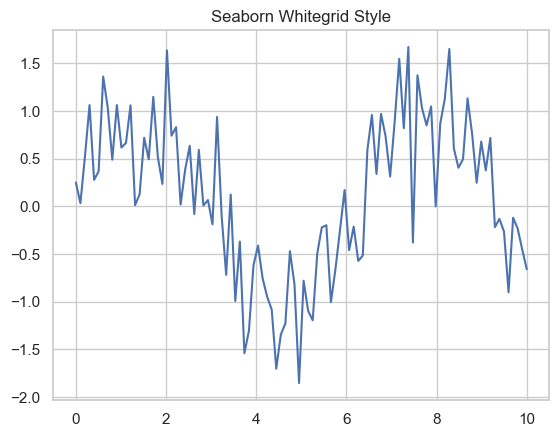

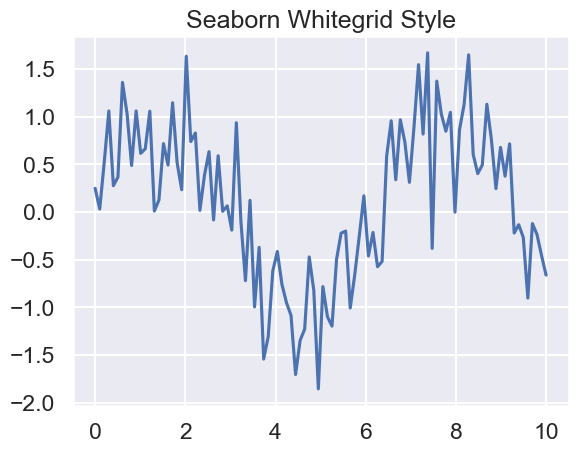

In [6]:
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.5, 100)

sns.set_theme(style='whitegrid', context='notebook') # 'context' controls the scale of plot elements so your visualization fits its purpose.
plt.plot(x,y)
plt.title('Seaborn Whitegrid Style')
plt.show()

sns.set_theme(style='darkgrid', context='talk')   # Using 'talk' context for larger elements
plt.plot(x,y)
plt.title('Seaborn Whitegrid Style')
plt.show()

# Visualizing Relationships: Seaborn's Regression and Line Plots

Regression plots are designed to visualize the relationship between two continuous variables. They typically display a scatter plot of the data points and overlay a regression line (e.g., a linear regression line) that best fits the data. Seaborn's functions also often include a shaded area representing the confidence interval around the regression line, giving an indication of the uncertainty in the model's fit.

regplot(): Scatter Plot with Regression Line

Syntax:-                                                                                                                         
sns.regplot(x=variable_x, y=variable_y, data=dataframe, ...)

Key parameters:                                                                                                              
    x, y: Names of variables in data to be plotted.                                                                                     
    data: DataFrame containing the data.                                                                                                           
    color: Color of the plot elements.                                                                                                             
    scatter_kws: Dictionary of keyword arguments passed to the underlying scatter plot.                                                              
    line_kws: Dictionary of keyword arguments passed to the underlying line plot (regression line).                                                
    ci: Size of the confidence interval (e.g., 95 for 95% CI). Set to None to disable.                                                               
    order: Order of the regression polynomial fit (e.g., order=2 for quadratic regression).                                                        
    logistic: If True, data is modeled as logistic regression (for binary outcomes).

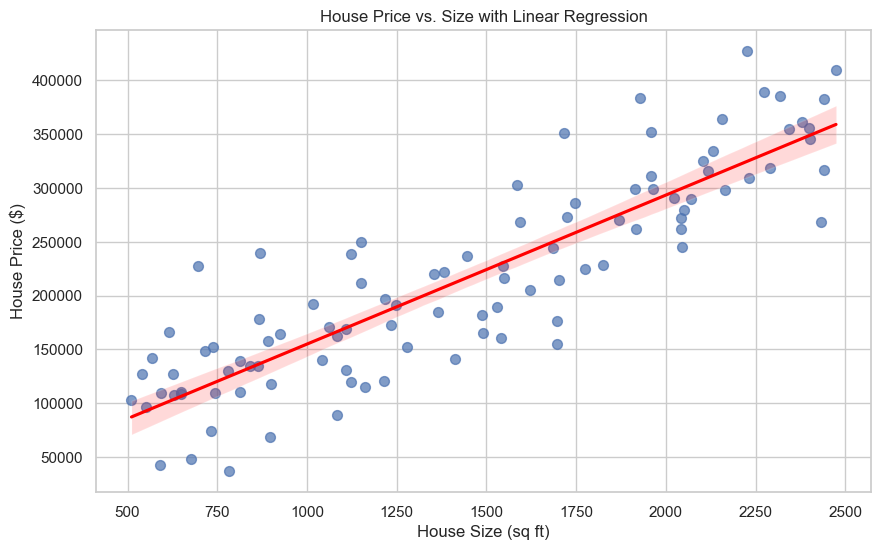

In [12]:
np.random.seed(42)
house_size = np.random.rand(100) * 2000 + 500
house_price = house_size * 150 + np.random.normal(0, 50000, 100)

df_houses = pd.DataFrame({'Size_sqft': house_size.flatten(), 'Price': house_price.flatten()}) 
# flatten() converts a multi-dimensional NumPy array into a 1-D array.

sns.set_theme(style='whitegrid')

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Size_sqft', y='Price', data=df_houses,
            scatter_kws={'s': 50, 'alpha': 0.7}, # Scatter plot customization
            line_kws={'color': 'red'},          # Regression line customization
            ci=95)                              # Show 95% confidence interval
# A confidence interval is a range of values that is likely to contain the true value of a population parameter (like mean, slope, or regression line).

plt.title('House Price vs. Size with Linear Regression')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.show()

lmplot(): Figure-Level Regression Plot

seaborn.lmplot() is a more powerful function that combines regplot() with FacetGrid. This means it can create regression plots across different subsets of your data, making it ideal for visualizing how relationships change across categories.

Syntax:
sns.lmplot(x=variable_x, y=variable_y, data=dataframe, ...)

Key additional parameters:                                                                                                           
    col: Name of a variable in data to create separate columns of plots for each unique value.                                                  
    row: Name of a variable in data to create separate rows of plots for each unique value.                                                       
    hue: Name of a variable in data to map plot elements (like color and regression line) to different subsets.                                  
    height: Height (in inches) of each facet.                                                                                                         
    aspect: Aspect ratio of each facet.

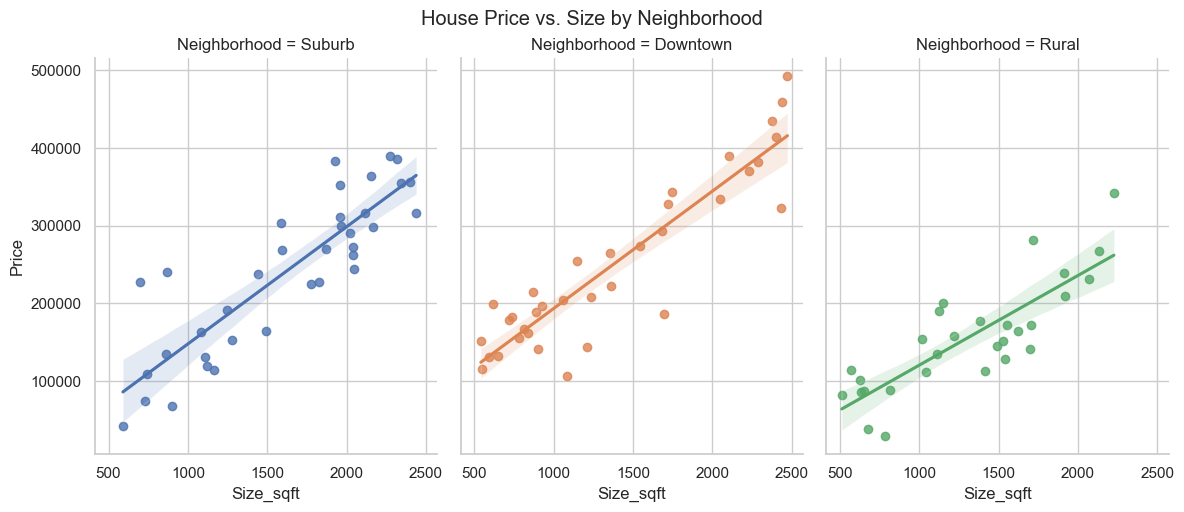

In [13]:
neighborhoods = ['Downtown', 'Suburb', 'Rural']
df_houses['Neighborhood'] = np.random.choice(neighborhoods, size=100)

# Adjust prices slightly based on neighborhood for demonstration
df_houses.loc[df_houses['Neighborhood'] == 'Downtown', 'Price'] *= 1.2
df_houses.loc[df_houses['Neighborhood'] == 'Rural', 'Price'] *= 0.8

# Create the lmplot, faceting by Neighborhood
sns.lmplot(x='Size_sqft', y='Price', data=df_houses,
           col='Neighborhood',       # Create columns for each neighborhood
           hue='Neighborhood',       # Color points and lines by neighborhood
           height=5, aspect=0.8,     # Adjust figure size
           ci=95)

plt.suptitle('House Price vs. Size by Neighborhood', y=1.02) # Add a main title
plt.show()

lineplot(): Visualizing Trends Over Time or Sequence

While regplot and lmplot are for relationships between two numerical variables, seaborn.lineplot() is excellent for showing trends, especially when one variable represents time or a sequential order.

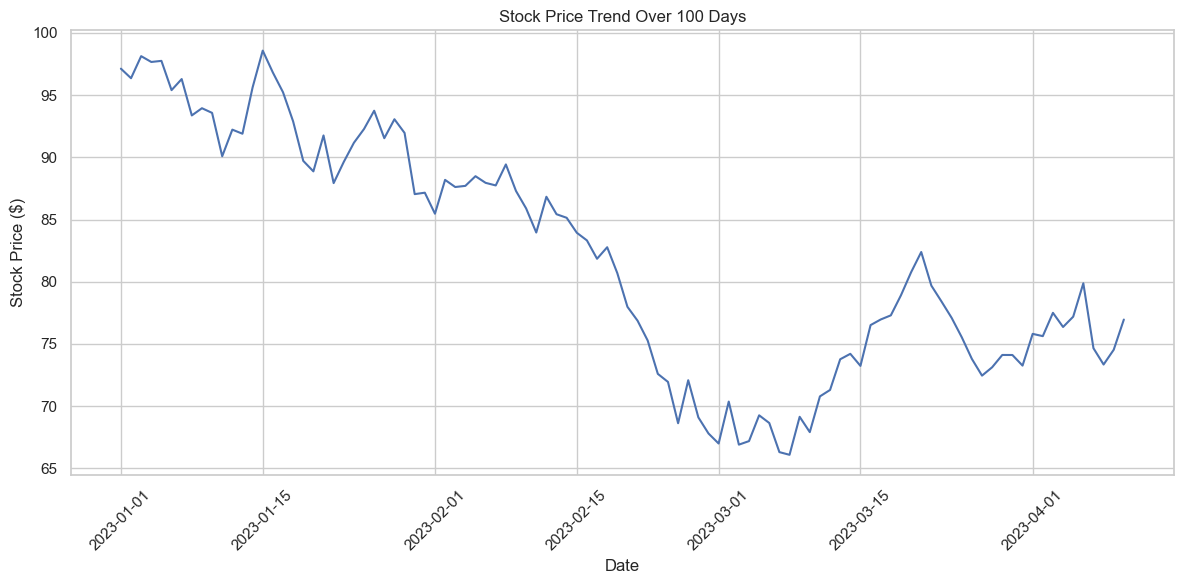

In [15]:
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
stock_price = 100 + np.cumsum(np.random.randn(100) * 2)

df_stock = pd.DataFrame({'Date': dates, 'Price': stock_price})

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', data=df_stock)
plt.title('Stock Price Trend Over 100 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Tailoring Your Visuals: Advanced Customization of Seaborn Plots

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22488\3691070778.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Value', data=df, palette='Set2')


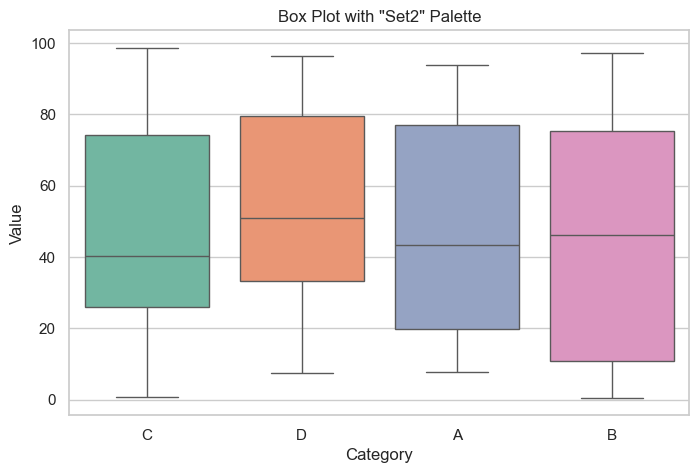

In [17]:
np.random.seed(42)
data = {
    'Category': np.random.choice(['A', 'B', 'C', 'D'], 100),
    'Value': np.random.rand(100) * 100,
    'Group': np.random.choice(['X', 'Y'], 100)
}
df = pd.DataFrame(data)

# Using a qualitative palette
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Value', data=df, palette='Set2')
plt.title('Box Plot with "Set2" Palette')
plt.show()

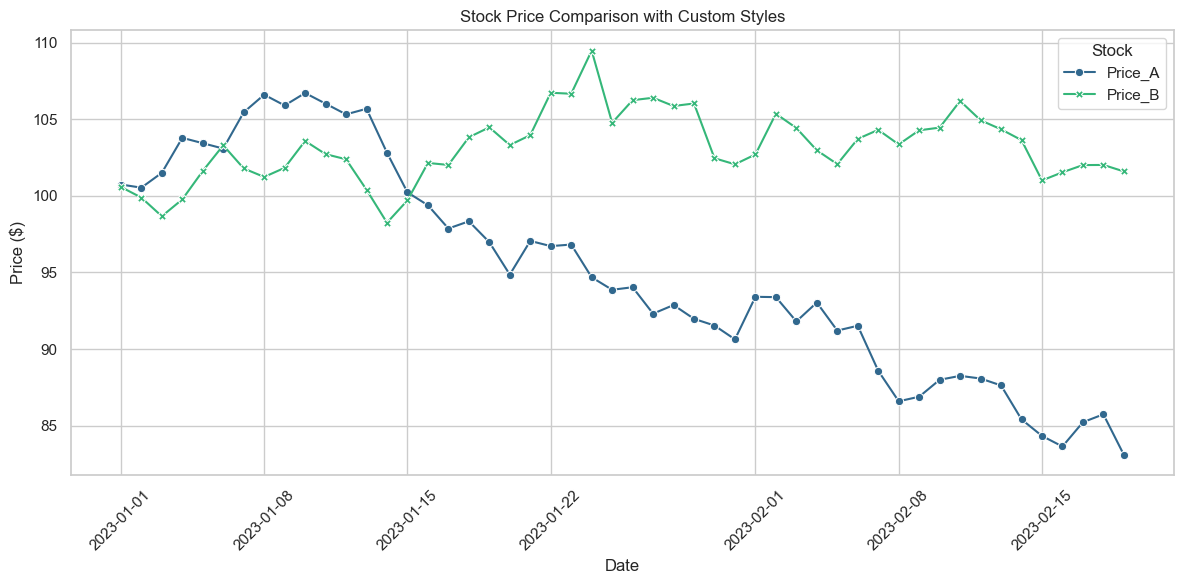

In [20]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=50, freq='D')
price_a = 100 + np.cumsum(np.random.randn(50) * 1.5)
price_b = 100 + np.cumsum(np.random.randn(50) * 1.8)

df_prices = pd.DataFrame({'Date': dates, 'Price_A': price_a, 'Price_B': price_b})
df_prices_melted = df_prices.melt(id_vars='Date', var_name='Stock', value_name='Price') 
# melt() transforms a wide DataFrame into a long (tidy) DataFrame.

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Price', hue='Stock', style='Stock', # Use hue for color, style for line type
             markers=True, dashes=False, # Show markers, disable dashes for now
             data=df_prices_melted, palette='viridis')
plt.title('Stock Price Comparison with Custom Styles')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()